In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML_DATASETS/datasets/OSL Datasets/Lesson_5/Datasets/driver-data.csv")

In [ ]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,3.423312e+09,1154.844867,3.423310e+09,3.423311e+09,3.423312e+09,3.423313e+09,3.423314e+09
mean_dist_day,4000.0,7.604152e+01,53.469563,1.552000e+01,4.524750e+01,5.333000e+01,6.563250e+01,2.447900e+02
mean_over_speed_perc,4000.0,1.072100e+01,13.708543,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+02


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_analyze = df.drop('id',axis=1)

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
model.fit(df_analyze)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
print(model.labels_)

[0 0 0 ... 1 1 1]


In [ ]:
import numpy as np

In [ ]:
unique, counts = np.unique(model.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 3200, 1: 800}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_analyze['cluster'] = model.labels_


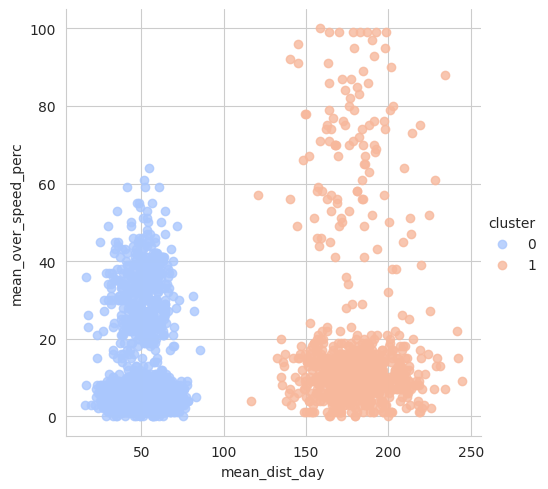

In [ ]:
sns.set_style('whitegrid') 
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',hue ='cluster',palette = 'coolwarm',aspect=1,fit_reg=False,data=df_analyze)

In [ ]:
model_2 = KMeans(n_clusters=4)
model_2.fit(df.drop('id',axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
print(model_2.cluster_centers_)

[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]


In [ ]:
unique,counts = np.unique(model_2.labels_,return_counts =True)
print(dict(zip(unique,counts)))

{0: 2775, 1: 696, 2: 104, 3: 425}


In [ ]:
df_analyze['cluster'] = model_2.labels_


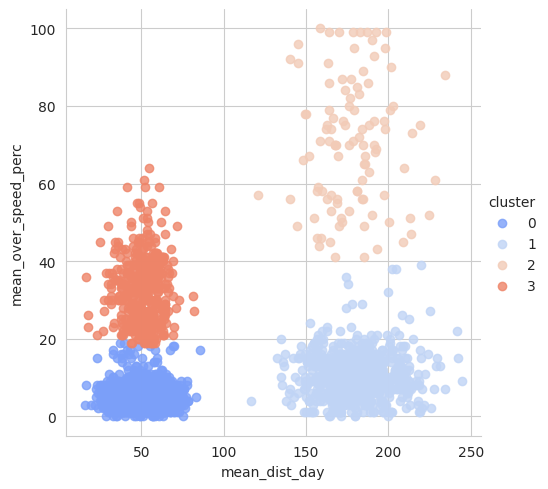

In [ ]:
sns.set_style('whitegrid') 
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',hue ='cluster',palette = 'coolwarm',aspect=1,fit_reg=False,data=df_analyze)
